# Übung 5: Backpropagation für Mehrschichtperzeptronen

In [741]:
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.colors import ListedColormap
import pandas as pd

np.set_printoptions(suppress=True, linewidth=np.inf)
sns.set_style("darkgrid")

%reload_ext version_information
%version_information numpy, seaborn, pandas

Software versions
Python 3.6.9 64bit [GCC 7.3.0]
IPython 7.10.1
OS Linux 4.15.0 72 generic x86_64 with debian buster sid
numpy 1.16.3
seaborn 0.9.0
pandas 0.25.3
Wed Dec 11 18:11:19 2019 CET

In [742]:
def generate_data(x_range, y_range, num):
    lx_range, ux_range = x_range
    ly_range, uy_range = y_range
    data = np.asarray([[np.random.uniform(lx_range, ux_range), np.random.uniform(ly_range, uy_range)] for i in range(num)])
    labels = []
    for i, point in enumerate(data):
        x, y = point
        if x < 0 and y < 0:
            labels.append(0)        
        elif x < 0 and y > 0:
            labels.append(1)        
        elif x > 0 and y < 0:
            labels.append(1)        
        else:
            labels.append(0)
    return data, np.asarray(labels)

def sigmoid(z):
    return 1.0/(1.0+np.exp(-z))

def forward(a, w, b):
    return sigmoid(np.dot(w, a) + b.squeeze())

## 1. Spielzeugdatensatz

### 1.1) + 1.2) Generieren und labeln der Spielzeugdaten

In [743]:
x_range = (-6.0, 6.0)
y_range = (-6.0, 6.0)
num_data = 200
train_data, train_labels = generate_data(x_range, y_range, num_data)
test_data, test_labels = generate_data(x_range, y_range, num_data)
print(train_data.shape, train_labels.shape)
print(test_data.shape, test_labels.shape)

(200, 2) (200,)
(200, 2) (200,)


### 1.3) Ploten der Spielzeugdaten(train und test)

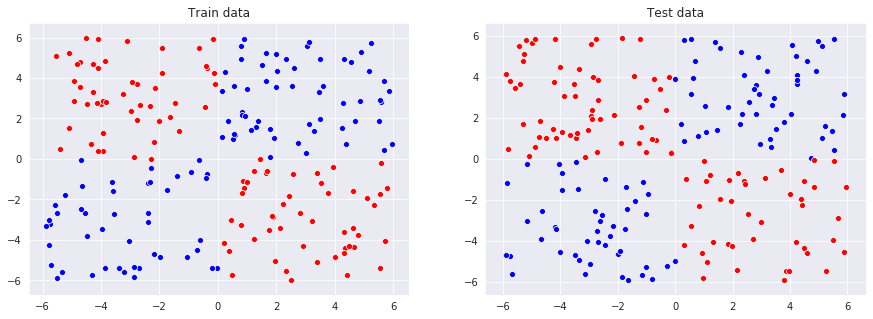

In [744]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

train_data_0 = train_data[train_labels == 0]
train_data_1 = train_data[train_labels == 1]
sns.scatterplot(x=train_data_0[:, 0], y=train_data_0[:, 1], color='blue', ax=axes[0])
sns.scatterplot(x=train_data_1[:, 0], y=train_data_1[:, 1], color='red', ax=axes[0])
axes[0].set_title("Train data")

test_data_0 = test_data[test_labels == 0]
test_data_1 = test_data[test_labels == 1]
sns.scatterplot(x=test_data_0[:, 0], y=test_data_0[:, 1], color='blue', ax=axes[1])
sns.scatterplot(x=test_data_1[:, 0], y=test_data_1[:, 1], color='red', ax=axes[1])
axes[1].set_title("Test data");

### 1.4) 

In [745]:
%%latex
Gewichte der Neuronen im Hidden Layer(Layer 2): 
\begin{align}
    w^{2}_{i1} = \begin{pmatrix} 0 \\ 1 \end{pmatrix}, b^{2}_{1} = 0  \\
    w^{2}_{i2} = \begin{pmatrix} 1 \\ 0 \end{pmatrix}, b^{2}_{2} = 0
\end{align}

<IPython.core.display.Latex object>

### 1.5) 

In [746]:
weights = np.asarray([[0, 1], [1, 0]])
biases = np.asarray([[0], [0]])
values = np.zeros(shape=(2, 100, 100))

xs = np.linspace(-6.0, 6.0, 100)
ys = np.linspace(-6.0, 6.0, 100)

for i in range(2):
    for xidx, x in enumerate(xs):
        for yidx, y in enumerate(ys):
            values[i, yidx, xidx] = forward(np.array([x, y]), weights[i], biases[i])
values = np.asarray(values)

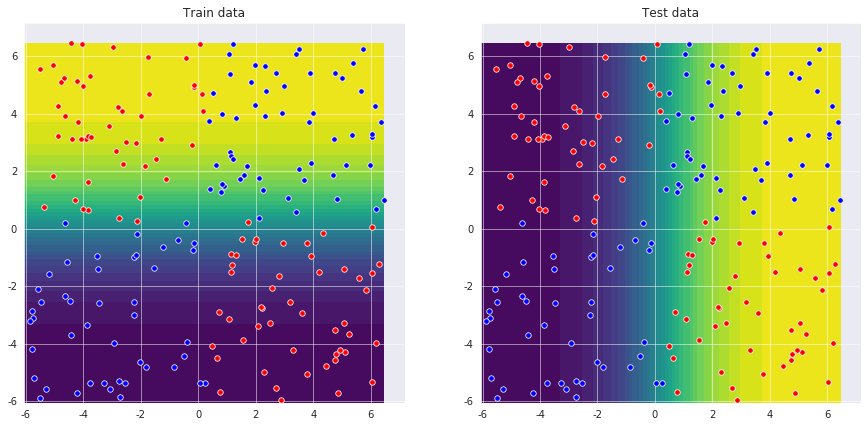

In [747]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 10))
palette = sns.color_palette("viridis", 32)
cmap = ListedColormap(sns.color_palette(palette).as_hex())

axes[0].imshow(values[0], interpolation='none', cmap=cmap)
axes[0].grid(color='w', linestyle='-', linewidth=0.5)
axes[0].invert_yaxis()

train_data_0 = train_data[train_labels == 0]
train_data_1 = train_data[train_labels == 1]
train_data_0_plot = (train_data_0 + 6) * (100/12)
train_data_1_plot = (train_data_1 + 6) * (100/12)
sns.scatterplot(x=train_data_0_plot[:, 0], y=train_data_0_plot[:, 1], color='blue', ax=axes[0], s=30)
sns.scatterplot(x=train_data_1_plot[:, 0], y=train_data_1_plot[:, 1], color='red', ax=axes[0], s=30)
axes[0].set_title("Train data")

pos_list = np.arange(0, 100, 16)
value_list = np.arange(-6, 8, 2)
axes[0].xaxis.set_major_locator(ticker.FixedLocator((pos_list)))
axes[0].xaxis.set_major_formatter(ticker.FixedFormatter((value_list)))
axes[0].yaxis.set_major_locator(ticker.FixedLocator((pos_list)))
axes[0].yaxis.set_major_formatter(ticker.FixedFormatter((value_list)))


axes[1].imshow(values[1], interpolation='none', cmap=cmap)
axes[1].grid(color='w', linestyle='-', linewidth=0.5)
axes[1].invert_yaxis()

train_data_0 = train_data[train_labels == 0]
train_data_1 = train_data[train_labels == 1]
train_data_0_plot = (train_data_0 + 6) * (100/12)
train_data_1_plot = (train_data_1 + 6) * (100/12)
sns.scatterplot(x=train_data_0_plot[:, 0], y=train_data_0_plot[:, 1], color='blue', ax=axes[1], s=30)
sns.scatterplot(x=train_data_1_plot[:, 0], y=train_data_1_plot[:, 1], color='red', ax=axes[1], s=30)
axes[1].set_title("Test data")

pos_list = np.arange(0, 100, 16)
value_list = np.arange(-6, 8, 2)
axes[1].xaxis.set_major_locator(ticker.FixedLocator((pos_list)))
axes[1].xaxis.set_major_formatter(ticker.FixedFormatter((value_list)))
axes[1].yaxis.set_major_locator(ticker.FixedLocator((pos_list)))
axes[1].yaxis.set_major_formatter(ticker.FixedFormatter((value_list)))

In [750]:
x_coord, y_coord = -6, -6 
print("Datenpunkt ({}, {}) wird vom ersten Hidden Layer klassifiziert: ".format(x_coord, y_coord))
predictions = forward(np.array([x_coord, y_coord]), weights, biases)
print("Neuron 1: {}, Neuron 2: {}".format(predictions[0], predictions[1]))
print()
x_coord, y_coord = -6, 6 
print("Datenpunkt ({}, {}) wird vom ersten Hidden Layer klassifiziert: ".format(x_coord, y_coord))
predictions = forward(np.array([x_coord, y_coord]), weights, biases)
print("Neuron 1: {}, Neuron 2: {}".format(predictions[0], predictions[1]))
print()
x_coord, y_coord = 6, 6 
print("Datenpunkt ({}, {}) wird vom ersten Hidden Layer klassifiziert: ".format(x_coord, y_coord))
predictions = forward(np.array([x_coord, y_coord]), weights, biases)
print("Neuron 1: {}, Neuron 2: {}".format(predictions[0], predictions[1]))
print()
x_coord, y_coord = 6, -6 
print("Datenpunkt ({}, {}) wird vom ersten Hidden Layer klassifiziert: ".format(x_coord, y_coord))
predictions = forward(np.array([x_coord, y_coord]), weights, biases)
print("Neuron 1: {}, Neuron 2: {}".format(predictions[0], predictions[1]));

Datenpunkt (-6, -6) wird vom ersten Hidden Layer klassifiziert: 
Neuron 1: 0.0024726231566347743, Neuron 2: 0.0024726231566347743

Datenpunkt (-6, 6) wird vom ersten Hidden Layer klassifiziert: 
Neuron 1: 0.9975273768433653, Neuron 2: 0.0024726231566347743

Datenpunkt (6, 6) wird vom ersten Hidden Layer klassifiziert: 
Neuron 1: 0.9975273768433653, Neuron 2: 0.9975273768433653

Datenpunkt (6, -6) wird vom ersten Hidden Layer klassifiziert: 
Neuron 1: 0.0024726231566347743, Neuron 2: 0.9975273768433653


### 1.6)

In [749]:
train_activations = np.array([forward(train_data[i], weights, biases) for i in range(num_data)])
test_activations = np.array([forward(test_data[i], weights, biases) for i in range(num_data)])